In [1]:
import pandas as pd
import os
PATH = "airports-airlines-and-routes"
def load_data(path=PATH):
    csv_path = os.path.join(path, "airports.csv")
    return pd.read_csv(csv_path)

In [2]:
airports = load_data()
airports.head()

Airport ID                                         Name          City  \
0           1                               Goroka Airport        Goroka   
1           2                               Madang Airport        Madang   
2           3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3           4                               Nadzab Airport        Nadzab   
4           5  Port Moresby Jacksons International Airport  Port Moresby   

            Country IATA  ICAO  Latitude   Longitude  Altitude Timezone DST  \
0  Papua New Guinea  GKA  AYGA -6.081690  145.391998      5282       10   U   
1  Papua New Guinea  MAG  AYMD -5.207080  145.789001        20       10   U   
2  Papua New Guinea  HGU  AYMH -5.826790  144.296005      5388       10   U   
3  Papua New Guinea  LAE  AYNZ -6.569803  146.725977       239       10   U   
4  Papua New Guinea  POM  AYPY -9.443380  147.220001       146       10   U   

  Tz database time zone     Type       Source  
0  Pacific/Port_Moresby  airport  OurAirports  
1  Pacific/Port_Moresby  airport  OurAirports  
2  Pacific/Port_Moresby  airport  OurAirports  
3  Pacific/Port_Moresby  airport  OurAirports  
4  Pacific/Port_Moresby  airport  OurAirports

In [3]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7698 entries, 0 to 7697
Data columns (total 14 columns):
Airport ID               7698 non-null int64
Name                     7698 non-null object
City                     7649 non-null object
Country                  7698 non-null object
IATA                     7698 non-null object
ICAO                     7698 non-null object
Latitude                 7698 non-null float64
Longitude                7698 non-null float64
Altitude                 7698 non-null int64
Timezone                 7698 non-null object
DST                      7698 non-null object
Tz database time zone    7698 non-null object
Type                     7698 non-null object
Source                   7698 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 842.1+ KB


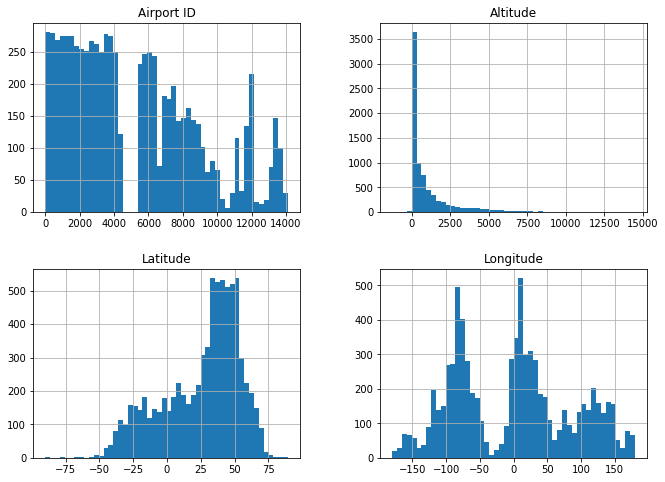

In [5]:
import matplotlib.pyplot as plt
airports.hist(bins=50, figsize=(11,8))
plt.savefig("histograms")
plt.show()


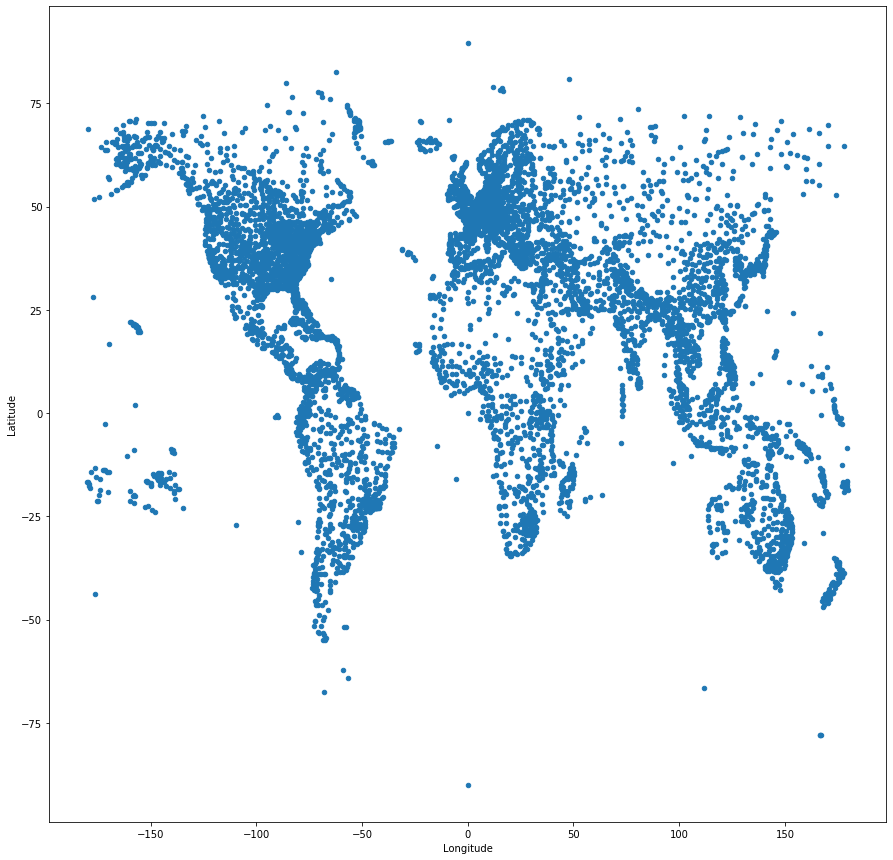

In [5]:
airports.plot(kind="scatter", x="Longitude", y="Latitude",figsize=(15,15))

In [6]:
is_indian = airports['Country']=='India'

In [7]:
print(is_indian.head())

0    False
1    False
2    False
3    False
4    False
Name: Country, dtype: bool


In [8]:
indian_airports = airports[is_indian]

In [9]:
indian_airports.head()

Airport ID                                            Name        City  \
2836        2994  Sardar Vallabhbhai Patel International Airport   Ahmedabad   
2837        2995                                   Akola Airport       Akola   
2838        2996                              Aurangabad Airport  Aurangabad   
2839        2997       Chhatrapati Shivaji International Airport      Mumbai   
2840        2998                                Bilaspur Airport    Bilaspur   

     Country IATA  ICAO   Latitude  Longitude  Altitude Timezone DST  \
2836   India  AMD  VAAH  23.077200  72.634697       189      5.5   N   
2837   India  AKD  VAAK  20.698999  77.058601       999      5.5   N   
2838   India  IXU  VAAU  19.862700  75.398102      1911      5.5   N   
2839   India  BOM  VABB  19.088699  72.867897        39      5.5   N   
2840   India  PAB  VABI  21.988400  82.111000       899      5.5   N   

     Tz database time zone     Type       Source  
2836         Asia/Calcutta  airport  OurAirports  
2837         Asia/Calcutta  airport  OurAirports  
2838         Asia/Calcutta  airport  OurAirports  
2839         Asia/Calcutta  airport  OurAirports  
2840         Asia/Calcutta  airport  OurAirports

In [10]:
indian_airports.shape

(148, 14)

In [11]:
len(indian_airports)

148

In [12]:
PATH = "airports-airlines-and-routes"
def load_data_routes(path=PATH):
    csv_path = os.path.join(path, "routes.csv")
    return pd.read_csv(csv_path)

In [13]:
routes = load_data_routes()

In [14]:
routes.head()

Airline Airline ID Source airport Source airport ID Destination airport  \
0      2B        410            AER              2965                 KZN   
1      2B        410            ASF              2966                 KZN   
2      2B        410            ASF              2966                 MRV   
3      2B        410            CEK              2968                 KZN   
4      2B        410            CEK              2968                 OVB   

  Destination airport ID Codeshare  Stops Equipment  
0                   2990       NaN      0       CR2  
1                   2990       NaN      0       CR2  
2                   2962       NaN      0       CR2  
3                   2990       NaN      0       CR2  
4                   4078       NaN      0       CR2

In [15]:
airport_ids = indian_airports['Airport ID'].astype(str).values.tolist()

In [16]:
len(airport_ids)

148

In [17]:
indian_routes = routes[routes['Source airport ID'].isin(airport_ids)]
indian_routes.head()

Airline Airline ID Source airport Source airport ID Destination airport  \
1027      4H       8463            CCU              3043                 CGP   
1028      4H       8463            CCU              3043                 DAC   
1196      4Q      10758            DEL              3093                 HEA   
1197      4Q      10758            DEL              3093                 KBL   
2115      6E       2850            AMD              2994                 BLR   

     Destination airport ID Codeshare  Stops Equipment  
1027                   3069       NaN      0       AT7  
1028                   3076       NaN      0       AT7  
1196                   2048       NaN      0       320  
1197                   2050       NaN      0       320  
2115                   3131       NaN      0       320

In [18]:
indian_routes.head()
len(indian_routes)

1433

In [19]:
domestic_routes = indian_routes[indian_routes['Destination airport ID'].isin(airport_ids)]
len(domestic_routes)
domestic_routes.head()

Airline Airline ID Source airport Source airport ID Destination airport  \
2115      6E       2850            AMD              2994                 BLR   
2116      6E       2850            AMD              2994                 BOM   
2117      6E       2850            AMD              2994                 CCU   
2118      6E       2850            AMD              2994                 DEL   
2119      6E       2850            AMD              2994                 GOI   

     Destination airport ID Codeshare  Stops Equipment  
2115                   3131       NaN      0       320  
2116                   2997       NaN      0       320  
2117                   3043       NaN      0       320  
2118                   3093       NaN      0       320  
2119                   3007       NaN      0       320

In [20]:
source_is_indian = routes['Source airport ID'].isin(airport_ids)
source_is_not_indian = source_is_indian==False
destination_is_indian = routes['Destination airport ID'].isin(airport_ids)
destination_is_not_indian = destination_is_indian==False
international_routes = routes[(source_is_indian & destination_is_not_indian) | (source_is_not_indian & destination_is_indian)]
international_routes.head()
len(international_routes)


954

In [21]:
international_routes.head()

Airline Airline ID Source airport Source airport ID Destination airport  \
1027      4H       8463            CCU              3043                 CGP   
1028      4H       8463            CCU              3043                 DAC   
1029      4H       8463            CGP              3069                 CCU   
1035      4H       8463            DAC              3076                 CCU   
1196      4Q      10758            DEL              3093                 HEA   

     Destination airport ID Codeshare  Stops Equipment  
1027                   3069       NaN      0       AT7  
1028                   3076       NaN      0       AT7  
1029                   3043       NaN      0       AT7  
1035                   3043       NaN      0       AT7  
1196                   2048       NaN      0       320

In [22]:
domestic_outbound_list = domestic_routes['Source airport ID'].value_counts()
domestic_inbound_list = domestic_routes['Destination airport ID'].value_counts()
print(domestic_outbound_list)
#print(domestic_outbound_list[0])
#type(domestic_outbound_list)

3093    147
2997    133
3043     72
3131     66
3144     57
       ... 
3012      1
7774      1
3130      1
3085      1
3103      1
Name: Source airport ID, Length: 68, dtype: int64


In [23]:
domestic_outbound_list.head()

3093    147
2997    133
3043     72
3131     66
3144     57
Name: Source airport ID, dtype: int64

In [24]:
print(domestic_outbound_list[0])
#data_f = pd.DataFrame(domestic_outbound_list.astype(str), columns = ['Airport ID', 'Outbound Flights'])

147


In [25]:
df1 = domestic_outbound_list.to_frame()

In [26]:
df1['Airport ID'] = df1.index

In [27]:
df1.reset_index(level=0, inplace=True)

In [28]:
del df1['index']

In [29]:
df1.head()

Source airport ID Airport ID
0                147       3093
1                133       2997
2                 72       3043
3                 66       3131
4                 57       3144

In [30]:
outbound_df = df1.rename(columns={"Source airport ID": "Outbound count"})

In [31]:
outbound_df.head()

Outbound count Airport ID
0             147       3093
1             133       2997
2              72       3043
3              66       3131
4              57       3144

In [32]:
df2 = domestic_inbound_list.to_frame()
df2['Airport ID'] = df2.index
df2.reset_index(level=0, inplace=True)
del df2['index']
inbound_df = df2.rename(columns={"Destination airport ID": "Inbound count"})
inbound_df.head()

Inbound count Airport ID
0            147       3093
1            132       2997
2             72       3043
3             65       3131
4             58       3144

In [33]:
domestic_flight_frequency = pd.merge(inbound_df,outbound_df,on='Airport ID', how='left')
domestic_flight_frequency.head()

Inbound count Airport ID  Outbound count
0            147       3093             147
1            132       2997             133
2             72       3043              72
3             65       3131              66
4             58       3144              57

In [34]:
domestic_flight_frequency['Total'] = domestic_flight_frequency['Inbound count'] + domestic_flight_frequency['Outbound count']
domestic_flight_frequency.head()

Inbound count Airport ID  Outbound count  Total
0            147       3093             147    294
1            132       2997             133    265
2             72       3043              72    144
3             65       3131              66    131
4             58       3144              57    115

In [35]:
def load_data_airlines(path=PATH):
    csv_path = os.path.join(path, "airlines.csv")
    return pd.read_csv(csv_path)
airlines = load_data_airlines()

In [36]:
airlines.head()

Airline ID                                          Name Alias IATA ICAO  \
0          -1                                       Unknown    \N    -  NaN   
1           1                                Private flight    \N    -  NaN   
2           2                                   135 Airways    \N  NaN  GNL   
3           3                                 1Time Airline    \N   1T  RNX   
4           4  2 Sqn No 1 Elementary Flying Training School    \N  NaN  WYT   

  Callsign         Country Active  
0       \N              \N      Y  
1      NaN             NaN      Y  
2  GENERAL   United States      N  
3  NEXTIME    South Africa      Y  
4      NaN  United Kingdom      N

In [37]:
airline_list = domestic_routes['Airline ID'].value_counts()
airline_list.head()

218     201
2850    179
241     168
3000    168
4375    142
Name: Airline ID, dtype: int64

In [38]:
import numpy as np
top_25_df, middle_df, bottom_25_df = np.split(domestic_flight_frequency, [int(.25*len(domestic_flight_frequency)), int(.75*len(domestic_flight_frequency))])

In [39]:
len(domestic_flight_frequency)

68

In [40]:
top_25_df.head()
len(top_25_df)

17

In [41]:
bottom_25_df.head()
len(bottom_25_df)

17

In [42]:
len(middle_df)

34

In [43]:
top_25_df.head()

Inbound count Airport ID  Outbound count  Total
0            147       3093             147    294
1            132       2997             133    265
2             72       3043              72    144
3             65       3131              66    131
4             58       3144              57    115

In [44]:
middle_df.head()

Inbound count Airport ID  Outbound count  Total
17             13       3061              12     25
18             13       3066              13     26
19             12       3100              12     24
20             12       3098              12     24
21             11       3146              11     22

In [45]:
bottom_25_df.head()

Inbound count Airport ID  Outbound count  Total
51              2       6174               2      4
52              2       3080               2      4
53              2       6760               2      4
54              2       2999               2      4
55              2       3079               2      4

In [46]:
#Making A N*N dataframe for
print(middle_df)

    Inbound count Airport ID  Outbound count  Total
17             13       3061              12     25
18             13       3066              13     26
19             12       3100              12     24
20             12       3098              12     24
21             11       3146              11     22
22             10       3143               9     19
23             10       3063              11     21
24              9       3020              11     20
25              9       3084               9     18
26              9       3089               9     18
27              9       3050               9     18
28              8       3038               8     16
29              8       3137               9     17
30              8       3002               6     14
31              7       3023               7     14
32              7       3042               8     15
33              7       3055               7     14
34              6       3097               6     12
35          

In [47]:
len(domestic_routes.loc[(domestic_routes['Source airport ID'] == '2994') & (domestic_routes['Destination airport ID'] == '3131')])

1

In [48]:
flag = 0
top_25_array = np.zeros(shape=(len(top_25_df),len(top_25_df)))
for i in range(len(top_25_df)):
    flag = 0
    aid1 = top_25_df.iloc[i]['Airport ID']
    for j in range(i+1, len(top_25_df)):
        aid2 = top_25_df.iloc[j]['Airport ID']
        if(len(domestic_routes.loc[(domestic_routes['Source airport ID'] == aid1) & (domestic_routes['Destination airport ID'] == aid2)]) == 1):
            flag = 1
        if(flag == 1):
            top_25_array[i, j] = 1
print(top_25_array)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [49]:
flag = 0
middle_array = np.zeros(shape=(len(middle_df),len(middle_df)))
for i in range(len(middle_df)):
    flag = 0
    aid1 = middle_df.iloc[i]['Airport ID']
    for j in range(i+1, len(top_25_df)):
        flag = 0
        aid2 = middle_df.iloc[j]['Airport ID']
        if(len(domestic_routes.loc[(domestic_routes['Source airport ID'] == aid1) & (domestic_routes['Destination airport ID'] == aid2)]) == 1):
            flag = 1
        if(flag == 1):
            middle_array[i, j] = 1
print(middle_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [50]:
flag = 0
bottom_25_array = np.zeros(shape=(len(bottom_25_df),len(bottom_25_df)))
for i in range(len(bottom_25_df)):
    aid1 = bottom_25_df.iloc[i]['Airport ID']
    for j in range(i+1, len(top_25_df)):
        flag = 0
        aid2 = bottom_25_df.iloc[j]['Airport ID']
        if(len(domestic_routes.loc[(domestic_routes['Source airport ID'] == aid1) & (domestic_routes['Destination airport ID'] == aid2)]) == 1):
            flag = 1
        if(flag == 1):
            bottom_25_array[i, j] = 1
print(bottom_25_array)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [51]:
flag = 0
overall_array = np.zeros(shape=(len(domestic_flight_frequency),len(domestic_flight_frequency)))
for i in range(len(domestic_flight_frequency)):
    aid1 = domestic_flight_frequency.iloc[i]['Airport ID']
    for j in range(i+1, len(domestic_flight_frequency)):
        flag = 0
        aid2 = domestic_flight_frequency.iloc[j]['Airport ID']
        if(len(domestic_routes.loc[(domestic_routes['Source airport ID'] == aid1) & (domestic_routes['Destination airport ID'] == aid2)]) == 1):
            flag = 1
        if(flag == 1):
            overall_array[i, j] = 1
print(overall_array)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [52]:
print(overall_array.shape)

(68, 68)


In [53]:
airlines.head()

Airline ID                                          Name Alias IATA ICAO  \
0          -1                                       Unknown    \N    -  NaN   
1           1                                Private flight    \N    -  NaN   
2           2                                   135 Airways    \N  NaN  GNL   
3           3                                 1Time Airline    \N   1T  RNX   
4           4  2 Sqn No 1 Elementary Flying Training School    \N  NaN  WYT   

  Callsign         Country Active  
0       \N              \N      Y  
1      NaN             NaN      Y  
2  GENERAL   United States      N  
3  NEXTIME    South Africa      Y  
4      NaN  United Kingdom      N

In [54]:
is_indian = airlines['Country']=='India'
indian_airlines = airlines[is_indian]
indian_airlines.head()

Airline ID                Name Alias IATA ICAO       Callsign Country  \
218          218   Air India Limited    \N   AI  AIC       AIRINDIA   India   
241          241          Air Sahara    \N   S2  RSH         SAHARA   India   
569          569   Air India Express    \N   IX  AXB  EXPRESS INDIA   India   
1026        1026        Alliance Air    \N   CD  LLR         ALLIED   India   
1369        1370  Blue Dart Aviation    \N   BZ  BDA      BLUE DART   India   

     Active  
218       Y  
241       Y  
569       Y  
1026      N  
1369      N

In [55]:
len(indian_airlines)

29

In [56]:
airline_list = domestic_routes['Airline ID'].value_counts()
airline_list.head()

218     201
2850    179
241     168
3000    168
4375    142
Name: Airline ID, dtype: int64

In [57]:
df5 = airline_list.to_frame()
df5.reset_index(level=0, inplace=True)
#del df5['index']
airline_df = df5.rename(columns={"Airline ID": "Total"})

#indian_airline_df = df5.rename(columns={"index": "Airline ID"})

#inbound_df.head()
airline_df.head()

index  Total
0   218    201
1  2850    179
2   241    168
3  3000    168
4  4375    142

In [58]:
len(airline_df)

8

In [59]:
print(airline_df)

  index  Total
0   218    201
1  2850    179
2   241    168
3  3000    168
4  4375    142
5  2575     77
6   569     19
7  1057      1


In [60]:
airport_list = []
for i in range(len(domestic_flight_frequency)):
    airport_list.append(domestic_flight_frequency.iloc[i]['Airport ID'])
print((airport_list))


['3093', '2997', '3043', '3131', '3144', '6173', '3017', '3136', '3007', '2994', '3153', '3112', '3008', '3015', '3105', '3040', '3135', '3061', '3066', '3100', '3098', '3146', '3143', '3063', '3020', '3084', '3089', '3050', '3038', '3137', '3002', '3023', '3042', '3055', '3097', '3057', '3104', '3039', '3081', '2996', '3001', '3092', '3142', '3152', '3009', '3019', '3022', '6741', '5711', '3018', '3003', '6174', '3080', '6760', '2999', '3079', '6168', '7774', '3103', '3130', '3085', '6172', '3012', '3134', '3000', '3010', '3101', '3094']


In [61]:
top_25_airline, middle_airline, bottom_25_airline = np.split(airline_df, [int(.25*len(airline_df)), int(.75*len(airline_df))])

In [62]:
top_25_airline.head()
a = top_25_airline.iloc[0]['index']
print(a)

218


In [63]:
flag = 0
air_india_array = np.zeros(shape=(68,68))
for i in range(68):
    aid1 = domestic_flight_frequency.iloc[i]['Airport ID']
    for j in range(i, len(domestic_flight_frequency)):
        flag = 0
        aid2 = domestic_flight_frequency.iloc[j]['Airport ID']
        if((len(domestic_routes.loc[(domestic_routes['Source airport ID'] == aid1) & (domestic_routes['Destination airport ID'] == aid2)]) == 1)):
            new_df = domestic_routes.loc[(domestic_routes['Source airport ID'] == aid1) & (domestic_routes['Destination airport ID'] == aid2)]
            a = new_df.iloc[0]['Airline ID']
            if(a == '218'):
                flag = 1
        if(flag == 1):
            air_india_array[i, j] = 1
print(air_india_array)

print(np.count_nonzero(air_india_array))

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
23


In [64]:
air_india_airports = []
for i in range(len(domestic_routes)):
    a = domestic_routes.iloc[i]['Airline ID']
    if(a == '218'):
        air_india_airports.append(domestic_routes.iloc[i]['Source airport ID'])
        air_india_airports.append(domestic_routes.iloc[i]['Destination airport ID'])
        
air_india_airports = set(air_india_airports)
print(air_india_airports)

{'3081', '3089', '3010', '3063', '3094', '3084', '3042', '3080', '3039', '3079', '3023', '3043', '3097', '3002', '3020', '3093', '3001', '6174', '6760', '3101', '3137', '3142', '3061', '3098', '3130', '3009', '3085', '3040', '3103', '6173', '3015', '3022', '3050', '3143', '3092', '3055', '3104', '3146', '3019', '3112', '3100', '2997', '3057', '3131', '6172', '3144', '2996', '3038', '3008', '3012', '2994', '3153', '3136', '3105', '3017', '3135', '3066', '3007'}


In [65]:
indigo_airports = []
for i in range(len(domestic_routes)):
    a = domestic_routes.iloc[i]['Airline ID']
    if(a == '2850'):
        indigo_airports.append(domestic_routes.iloc[i]['Source airport ID'])
        indigo_airports.append(domestic_routes.iloc[i]['Destination airport ID'])
indigo_airports = set(indigo_airports)
print(indigo_airports)

{'3089', '3063', '3084', '3042', '3043', '3007', '3020', '3093', '3001', '3061', '3098', '3040', '6173', '3015', '3050', '3112', '3100', '2997', '3057', '3131', '3144', '3038', '3008', '2994', '3153', '3136', '3105', '3017', '3066', '3135'}


In [66]:
go_air_airports = []
for i in range(len(domestic_routes)):
    a = domestic_routes.iloc[i]['Airline ID']
    if(a == '2575'):
        go_air_airports.append(domestic_routes.iloc[i]['Source airport ID'])
        go_air_airports.append(domestic_routes.iloc[i]['Destination airport ID'])
go_air_airports = set(go_air_airports)
print(go_air_airports)

{'3089', '3063', '3043', '3093', '3061', '3098', '3040', '6173', '3015', '3104', '3146', '3112', '3100', '2997', '3131', '3144', '2994', '3136', '3105', '3017', '3007'}


In [67]:
air_india_express_airports = []
for i in range(len(domestic_routes)):
    a = domestic_routes.iloc[i]['Airline ID']
    if(a == '569'):
        air_india_express_airports.append(domestic_routes.iloc[i]['Source airport ID'])
        air_india_express_airports.append(domestic_routes.iloc[i]['Destination airport ID'])
        
air_india_express_airports = set(air_india_express_airports)
print(air_india_express_airports)

{'3144', '3137', '3153', '3143', '3136', '3152', '2997'}


In [68]:
print(type(overall_array))
air_india = overall_array
print(type(air_india))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [69]:
air_india = overall_array
air_india_score_matrix = np.zeros(shape=(68,68))
print("...")
D = 0
C = 0
AA = 0
MTC = 0
count = 0
i = 0
j = 0

########################    Air India ##########################################

for x in np.nditer(air_india):
    if(j==67):
        i+-1
        j=0
    else:
        j+=1
    
    if(i==j):
        continue
        
    for z in range(len(domestic_routes)):
        if((domestic_routes.iloc[z]['Source airport ID'] == airport_list[i] and domestic_routes.iloc[z]['Destination airport ID'] == airport_list[j]) or (domestic_routes.iloc[z]['Source airport ID'] == airport_list[j] and domestic_routes.iloc[z]['Destination airport ID'] == airport_list[i])):
            if(domestic_routes.iloc[z]['Airline ID'] == '218'):
                continue
    
    if(min(i,j) <= 17):
        D = 3
    elif(min(i,j) > 17 and min(i,j) < 51):
        D = 2
    else:
        D = 1
        
    if(airport_list[i] in air_india_airports and airport_list[j] in air_india_airports):
        C = 2
        
    elif(airport_list[i] in air_india_airports or airport_list[j] in air_india_airports):
        C = 1
    
    else:
        C = 0
        
    AA = 2
    
    for k in range(len(domestic_routes)):
        if((domestic_routes.iloc[k]['Source airport ID'] == airport_list[i] and domestic_routes.iloc[k]['Destination airport ID'] == airport_list[j]) or (domestic_routes.iloc[k]['Source airport ID'] == airport_list[j] and domestic_routes.iloc[k]['Destination airport ID'] == airport_list[i])):
            count += 1
    
    MTC = count/8
    score = (D + C + AA - MTC)/7
    air_india_score_matrix[i,j] = score
    D = 0
    C = 0
    AA = 0
    MTC = 0
    count = 0

print(air_india_score_matrix)
indigo = overall_array
indigo_score_matrix = np.zeros(shape=(68,68))

################################ Indigo ########################################################    

for x in np.nditer(indigo):
    if(j==67):
        i+-1
        j=0
    else:
        j+=1
    
    if(i==j):
        continue
        
    for z in range(len(domestic_routes)):
        if((domestic_routes.iloc[z]['Source airport ID'] == airport_list[i] and domestic_routes.iloc[z]['Destination airport ID'] == airport_list[j]) or (domestic_routes.iloc[z]['Source airport ID'] == airport_list[j] and domestic_routes.iloc[z]['Destination airport ID'] == airport_list[i])):
            if(domestic_routes.iloc[z]['Airline ID'] == '2850'):
                continue
    
    if(min(i,j) <= 17):
        D = 3
    elif(min(i,j) > 17 and min(i,j) < 51):
        D = 2
    else:
        D = 1
        
    if(airport_list[i] in indigo_airports and airport_list[j] in indigo_airports):
        C = 2
        
    elif(airport_list[i] in indigo_airports or airport_list[j] in indigo_airports):
        C = 1
    
    else:
        C = 0
        
    AA = 2
    
    for k in range(len(domestic_routes)):
        if((domestic_routes.iloc[k]['Source airport ID'] == airport_list[i] and domestic_routes.iloc[k]['Destination airport ID'] == airport_list[j]) or (domestic_routes.iloc[k]['Source airport ID'] == airport_list[j] and domestic_routes.iloc[k]['Destination airport ID'] == airport_list[i])):
            count += 1
    
    MTC = count/8
    score = (D + C + AA - MTC)/7
    indigo_score_matrix[i,j] = score
    D = 0
    C = 0
    AA = 0
    MTC = 0
    count = 0

print(indigo_score_matrix)
go_air = overall_array
go_air_score_matrix = np.zeros(shape=(68,68))

#################################### Go Air ##########################################
for x in np.nditer(go_air):
    if(j==67):
        i+-1
        j=0
    else:
        j+=1
    
    if(i==j):
        continue
        
    for z in range(len(domestic_routes)):
        if((domestic_routes.iloc[z]['Source airport ID'] == airport_list[i] and domestic_routes.iloc[z]['Destination airport ID'] == airport_list[j]) or (domestic_routes.iloc[z]['Source airport ID'] == airport_list[j] and domestic_routes.iloc[z]['Destination airport ID'] == airport_list[i])):
            if(domestic_routes.iloc[z]['Airline ID'] == '2575'):
                continue
    
    if(min(i,j) <= 17):
        D = 3
    elif(min(i,j) > 17 and min(i,j) < 51):
        D = 2
    else:
        D = 1
        
    if(airport_list[i] in go_air_airports and airport_list[j] in go_air_airports):
        C = 2
        
    elif(airport_list[i] in go_air_airports or airport_list[j] in go_air_airports):
        C = 1
    
    else:
        C = 0
        
    AA = 1
    
    for k in range(len(domestic_routes)):
        if((domestic_routes.iloc[k]['Source airport ID'] == airport_list[i] and domestic_routes.iloc[k]['Destination airport ID'] == airport_list[j]) or (domestic_routes.iloc[k]['Source airport ID'] == airport_list[j] and domestic_routes.iloc[k]['Destination airport ID'] == airport_list[i])):
            count += 1
    
    MTC = count/8
    score = (D + C + AA - MTC)/7
    go_air_score_matrix[i,j] = score
    D = 0
    C = 0
    AA = 0
    MTC = 0
    count = 0

print(go_air_score_matrix)
    
air_india_express = overall_array
air_india_express_score_matrix = np.zeros(shape=(68,68))

#################################### Air India Express ##########################################

for x in np.nditer(air_india_express):
    if(j==67):
        i+-1
        j=0
    else:
        j+=1
    
    if(i==j):
        continue
        
    for z in range(len(domestic_routes)):
        if((domestic_routes.iloc[z]['Source airport ID'] == airport_list[i] and domestic_routes.iloc[z]['Destination airport ID'] == airport_list[j]) or (domestic_routes.iloc[z]['Source airport ID'] == airport_list[j] and domestic_routes.iloc[z]['Destination airport ID'] == airport_list[i])):
            if(domestic_routes.iloc[z]['Airline ID'] == '569'):
                continue
    
    if(min(i,j) <= 17):
        D = 3
    elif(min(i,j) > 17 and min(i,j) < 51):
        D = 2
    else:
        D = 1
        
    if(airport_list[i] in air_india_express_airports and airport_list[j] in air_india_express_airports):
        C = 2
        
    elif(airport_list[i] in air_india_express_airports or airport_list[j] in air_india_express_airports):
        C = 1
    
    else:
        C = 0
        
    AA = 0
    
    for k in range(len(domestic_routes)):
        if((domestic_routes.iloc[k]['Source airport ID'] == airport_list[i] and domestic_routes.iloc[k]['Destination airport ID'] == airport_list[j]) or (domestic_routes.iloc[k]['Source airport ID'] == airport_list[j] and domestic_routes.iloc[k]['Destination airport ID'] == airport_list[i])):
            count += 1
    
    MTC = count/8
    score = (D + C + AA - MTC)/7
    air_india_express_score_matrix[i,j] = score
    D = 0
    C = 0
    AA = 0
    MTC = 0
    count = 0
   
                 
print(air_india_express_score_matrix)

...
[[0.         0.78571429 0.78571429 ... 1.         0.96428571 1.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0.         0.78571429 0.78571429 ... 0.85714286 0.82142857 0.85714286]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0.         0.64285714 0.64285714 ... 0.71428571 0.67857143 0.71428571]
 [0.         0.         0.         

In [73]:
print(air_india_score_matrix)
np.savetxt('air_india_score.csv', air_india_score_matrix, delimiter = ' ')

[[0.         0.78571429 0.78571429 ... 1.         0.96428571 1.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
